In [1]:
%matplotlib inline


from tkinter import *
from PIL import ImageTk
from tkinter import filedialog
import os

from skimage import io
from skimage.transform import resize
from skimage import color

from PIL import Image            
import numpy as np                
import matplotlib.pyplot as plt   

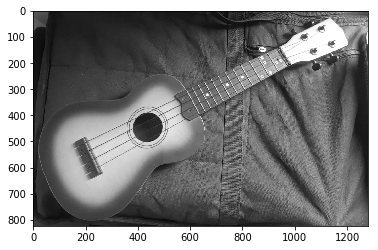

(1280, 823) L None


In [2]:
# imagen a utilizar
ukelele = Image.open("img/ukelele.jpeg")

plt.imshow(np.asarray(ukelele))

uke_gris = ukelele.convert('L')
#I_gris.show()
plt.imshow(np.asarray(uke_gris), cmap='gray')
plt.show()
print (uke_gris.size, uke_gris.mode, uke_gris.format)
Img_uke = np.asarray(uke_gris,dtype=np.float32)

In [3]:
def umbral(img, umbral):
    
    filas = np.size(img,0)
    columnas = np.size(img,1)
    
    new_Img = np.zeros((filas,columnas))

    for i in range(0,filas):
        for j in range(0, columnas):
            if img[i,j] <= umbral:
                new_Img[i,j] = 0
            else:
                new_Img[i,j] = 255

    return new_Img


In [52]:
def crearConjuntoS(ee,origen):
    f,c = ee.shape
    S = set()
    for i in range(f):
        for j in range(c):
            if(ee[i,j] == 1):
                S.add((i - origen[0], j - origen[1]))
    return S

def crearConjuntoX(img_bin):
    filas = np.size(img_bin,0)
    columnas = np.size(img_bin,1)
    X = set()
    for i in range(0,filas):
        for j in range(0, columnas):
            if(img_bin[i,j] == 255):
                X.add((i,j))
    return X, filas, columnas

def crearMatriz(conjunto, filas, columnas):
    matrix = np.zeros((filas + 3,columnas + 3))
    for c in conjunto:
        matrix[c[0], c[1]] = 255

    return matrix

In [54]:
def dilatacion(img_bin,ee, origen):
    X, filas, columnas = crearConjuntoX(img_bin)
    S = crearConjuntoS(ee,origen)
    d = set()
    sList = list(S)
    for xs in X:
        d.add( ( xs[0] + sList[1][0] , xs[1] + sList[1][1] ))
        d.add( ( xs[0] + sList[0][0] , xs[1] + sList[0][1] ))
    matrizDilatada = crearMatriz(d, filas, columnas)
    return matrizDilatada

In [55]:
def erosion(img_bin, ee, origen):
    X, filas, columnas = crearConjuntoX(img_bin)
    S = crearConjuntoS(ee,origen)
    e = set()
    sList = list(S)
    for xs in X:
        a = ( xs[0] + sList[1][0] , xs[1] + sList[1][1] )
        if (a in X):
            b = ( xs[0] + sList[0][0] , xs[1] + sList[0][1] )
            if (b in X):
                e.add(xs)
    matrizErocionada = crearMatriz(e, filas, columnas)
    return matrizErocionada

In [65]:
def apertura(img_bin, ee, origen):
    matrizApertura = dilatacion(erosion(img_bin, ee, origen),ee,origen)
    return matrizApertura

In [66]:
def cierre(img_bin, ee, origen):
    matrizcierre = erosion(dilatacion(img_bin, ee, origen),ee, origen)
    return matrizcierre

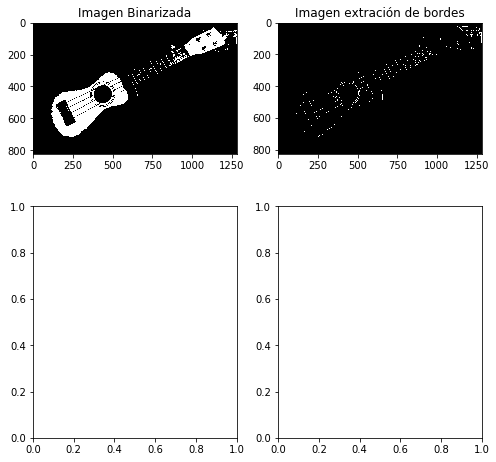

In [118]:
def bordes(img_bin, ee, origen):
    imgApertura = apertura(img_bin, ee, origen)
    imgErosion = erosion(img_bin, ee, origen)
    f,c = imgErosion.shape
    imgBord = imgApertura[0:f,0:c]  - imgErosion
    return imgBord
    
img_bordes = Image.fromarray(bordes(img_bin, ee, origen).astype(np.uint8))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

axes[0, 0].set_title('Imagen Binarizada')
axes[0, 0].imshow(img_bin,cmap='gray')

axes[0, 1].set_title('Imagen extración de bordes')
axes[0, 1].imshow(img_bordes, cmap='gray')

fig.tight_layout()
plt.show()

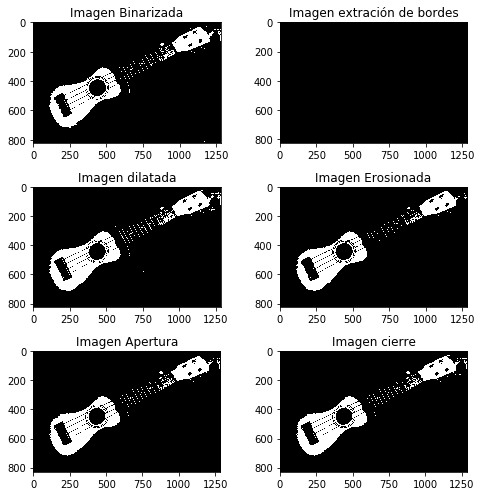

In [90]:
## Datos de la imagen
X = Img_uke
ee = np.array([[0,1,0],[1,1,1],[0,1,0]])
origen = [1,1]         

## Datos de prueba
#X_ = np.matrix([[0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [1, 1, 0, 0, 0],[1, 1, 0, 0, 0], [0, 0, 0, 0, 0]]) 
#ee = np.array([[1,1]])

# umbral definido para la binarización de la imagen
img_bin = umbral(X,180)

# Metodos de pruebas
img_dilatacion = Image.fromarray(dilatacion(img_bin,ee,origen).astype(np.uint8))
img_erosion = Image.fromarray(erosion(img_bin,ee, origen).astype(np.uint8))
img_apertura = Image.fromarray(apertura(img_bin, ee,origen).astype(np.uint8))
img_cierre = Image.fromarray(cierre(img_bin, ee,origen).astype(np.uint8))
img_bordes = Image.fromarray(bordes(img_bin, ee, origen).astype(np.uint8))

# graficar
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

axes[0, 0].set_title("Imagen Binarizada")
axes[0, 0].imshow(img_bin,cmap='gray')

axes[1, 0].set_title("Imagen dilatada")
axes[1, 0].imshow(img_dilatacion, cmap='gray')

axes[1, 1].set_title('Imagen Erosionada')
axes[1, 1].imshow(img_erosion, cmap='gray')

axes[2, 0].set_title('Imagen Apertura')
axes[2, 0].imshow(img_apertura, cmap='gray')

axes[2, 1].set_title('Imagen cierre')
axes[2, 1].imshow(img_cierre, cmap='gray')

axes[0, 1].set_title('Imagen extración de bordes')
axes[0, 1].imshow(img_bordes, cmap='gray')

fig.tight_layout()
plt.show()

In [22]:
def openfn():
    global filename
    filename = filedialog.askopenfilename(title='open')
    return filename
def open_img():
    global img
    x = openfn()
    img = Image.open(x)
    img = img.resize((300, 250), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    panel = Label(root, image=img)
    panel.image = img
    panel.pack()
def derivate_img():
    s = float(e.get())
    img_bin = umbral(X,130)
    img2 = Image.open('C:/Users/s112e1/borde.jpg')
    img2 = img2.resize((300, 250), Image.ANTIALIAS)
    img2 = ImageTk.PhotoImage(img2)
    panel = Label(root, image=img2)
    panel.image = img2
    panel.pack()

In [23]:
root = Tk()
root.geometry("550x300+300+150")
root.resizable(width=True, height=True)
frame = Frame(root)
frame.pack()
btn = Button(frame, text='Abrir imagen', command=open_img).pack(side=TOP)
btn7 = Button(frame, text='Imagen binaria', command=derivate_img).pack(side=LEFT)
btn2 = Button(frame, text='Dilatación', command=derivate_img).pack(side=LEFT)
btn3 = Button(frame, text='Erosión', command=derivate_img).pack(side=LEFT)
btn4 = Button(frame, text='Apertura', command=derivate_img).pack(side=LEFT)
btn5 = Button(frame, text='Cierre', command=derivate_img).pack(side=LEFT)
btn6 = Button(frame, text='Extracción de bordes', command=derivate_img).pack(side=LEFT)
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\melim\Anaconda3\lib\tkinter\__init__.py", line 1702, in __call__
    return self.func(*args)
  File "<ipython-input-22-40953254bc54>", line 15, in derivate_img
    s = float(e.get())
NameError: name 'e' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\melim\Anaconda3\lib\tkinter\__init__.py", line 1702, in __call__
    return self.func(*args)
  File "<ipython-input-22-40953254bc54>", line 15, in derivate_img
    s = float(e.get())
NameError: name 'e' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\melim\Anaconda3\lib\tkinter\__init__.py", line 1702, in __call__
    return self.func(*args)
  File "<ipython-input-22-40953254bc54>", line 15, in derivate_img
    s = float(e.get())
NameError: name 'e' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\melim\Anaconda3\li